In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt

In [2]:
trainingdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=True,download=True,transform=torchvision.transforms.ToTensor())
testdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=False,download=True,transform=torchvision.transforms.ToTensor())

100%|██████████| 26421880/26421880 [00:03<00:00, 8224276.73it/s] 


Extracting ./FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 141208.91it/s]


Extracting ./FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2734004.97it/s]


Extracting ./FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 8372344.70it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



Load the dataset.

In [4]:
all_data = torch.utils.data.ConcatDataset([trainingdata, testdata])
data_loader = torch.utils.data.DataLoader(trainingdata, batch_size=1, shuffle=True)
trainDataLoader = torch.utils.data.DataLoader(trainingdata, batch_size=16, shuffle=True)
testDataLoader = torch.utils.data.DataLoader(testdata, batch_size=16, shuffle=False)
images, labels = next(iter(trainDataLoader))

Display 10 representative images from each of the
classes.

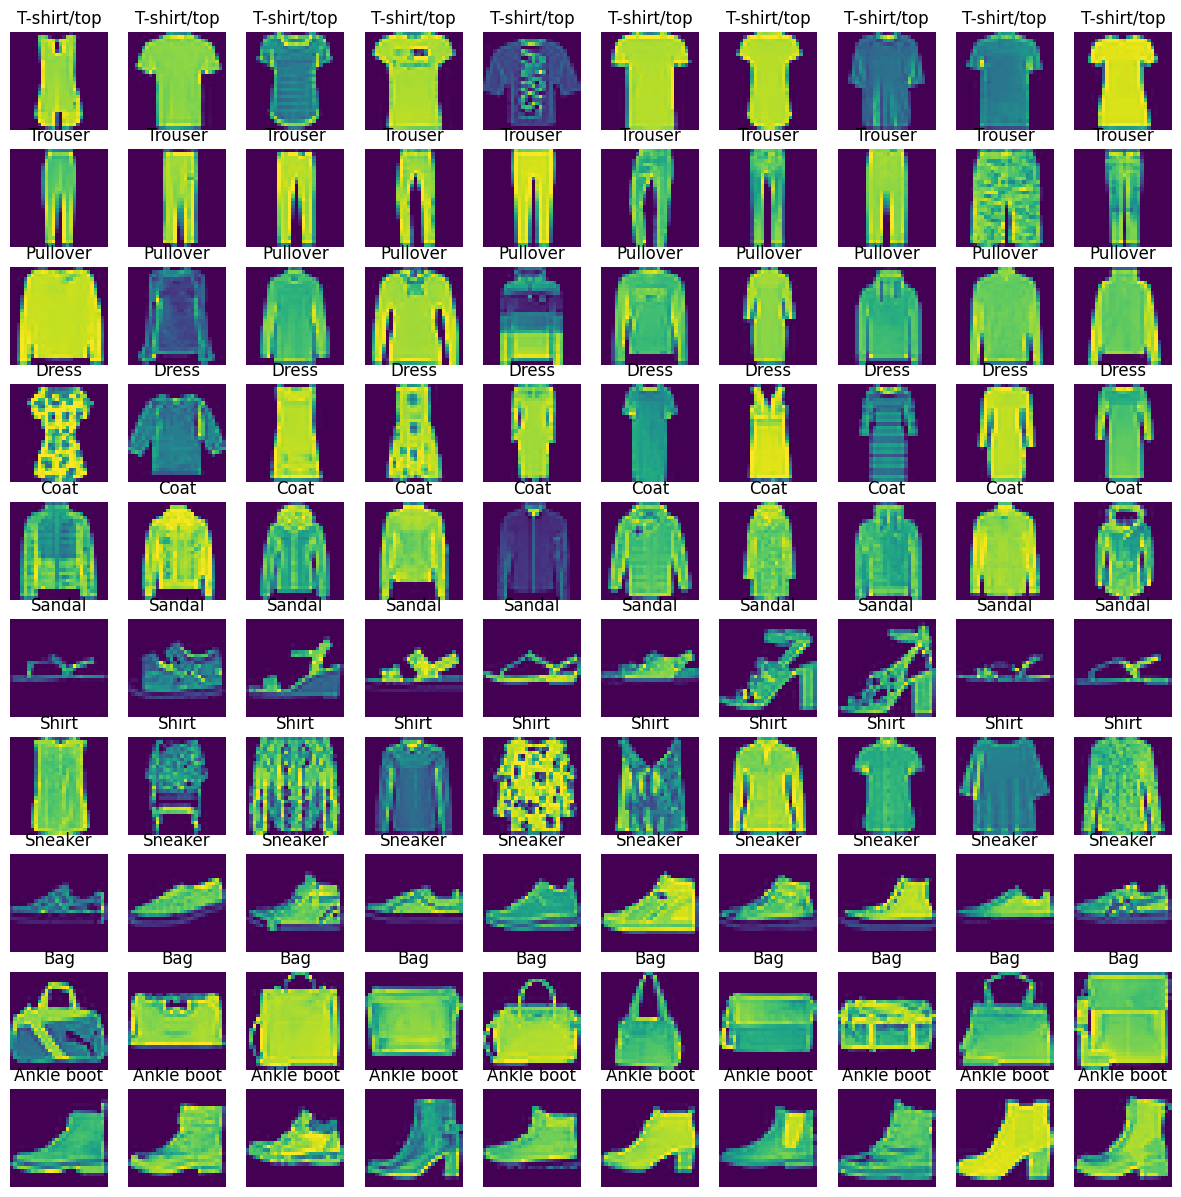

In [5]:
fig, axs = plt.subplots(10, 10, figsize=(15, 15))
class_counts = [0,0,0,0,0,0,0,0,0,0]
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for images, labels in data_loader:
    images = images.squeeze(0)
    labels = labels.item()

    if class_counts[labels] < 10:
        axs[labels, class_counts[labels]].imshow(images[0])
        axs[labels, class_counts[labels]].axis('off')
        axs[labels, class_counts[labels]].set_title(class_names[labels])
        class_counts[labels] += 1

    if ([10,10,10,10,10,10,10,10,10,10] == class_counts):
        break

plt.show()

Implement a simple 3-layer neural network classifier for this dataset. The
input is 784 features and the output is 10 classes, so the network should have
three sets of weighs: 784x200, 200x200, and 200x10. Use ReLU activations
for the hidden neurons.

In [6]:
class Net(torch.nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc_model = torch.nn.Sequential(
    torch.nn.Linear(28 * 28, 200),
    torch.nn.ReLU(),
    torch.nn.Linear(200, 200),
    torch.nn.ReLU(),
    torch.nn.Linear(200, 10))

  def forward(self, x):
    x = x.view(-1,28*28)
    x = self.fc_model(x)
    return x

In [7]:
net = Net().cuda()
print(net)

Net(
  (fc_model): Sequential(
    (0): Linear(in_features=784, out_features=200, bias=True)
    (1): ReLU()
    (2): Linear(in_features=200, out_features=200, bias=True)
    (3): ReLU()
    (4): Linear(in_features=200, out_features=10, bias=True)
  )
)


Train this network for 30 epochs and plot your train and test curves. Report
best test accuracy performance by tuning hyperparameters: pick learning
rates (0.1, 0.5), batch size (16,64).

In [8]:
def evaluate(dataloader):
  total, correct = 0, 0
  net.eval() # don't update weights
  for data in dataloader:
    images, labels = data
    images = images.cuda()
    labels = labels.cuda()
    predicted_output = net(images)
    _, predicted_labels = torch.max(predicted_output,1)
    total += labels.size(0)
    correct += (predicted_labels == labels).sum().item()
  return 100 * correct/total

lr = 0.1, bs = 16
Epoch 0, Train loss 0.5465597600201766, Test loss 0.4388471613585949
Epoch 1, Train loss 0.3907262361501654, Test loss 0.3901596208095551
Epoch 2, Train loss 0.35048131757304074, Test loss 0.37209300370812415
Epoch 3, Train loss 0.324451798256052, Test loss 0.37651789092868565
Epoch 4, Train loss 0.30745597513243555, Test loss 0.34990274006426336
Epoch 5, Train loss 0.29111205554846675, Test loss 0.34768064620420336
Epoch 6, Train loss 0.2786502916876537, Test loss 0.4056884393334389
Epoch 7, Train loss 0.26727529002216954, Test loss 0.333516444336623
Epoch 8, Train loss 0.2573164008711775, Test loss 0.3317109191894531
Epoch 9, Train loss 0.24880711061066638, Test loss 0.33610852791517976
Epoch 10, Train loss 0.24053122689543913, Test loss 0.3457315168466419
Epoch 11, Train loss 0.23533443381842226, Test loss 0.3428261691302061
Epoch 12, Train loss 0.2276548365840378, Test loss 0.33896509031280875
Epoch 13, Train loss 0.2221522227358073, Test loss 0.3288158079072833
E

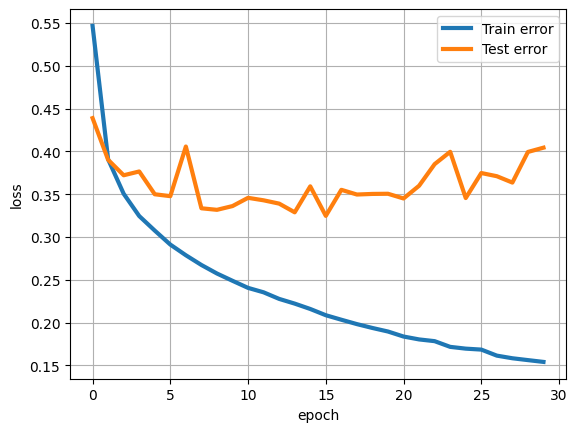

lr = 0.1, bs = 64
Epoch 0, Train loss 0.675861777717879, Test loss 0.6424709017489366
Epoch 1, Train loss 0.4321860769378351, Test loss 0.5722330054090281
Epoch 2, Train loss 0.3843097829742472, Test loss 0.5375101097450135
Epoch 3, Train loss 0.3535432020293624, Test loss 0.39631716233150216
Epoch 4, Train loss 0.3336765801808092, Test loss 0.37500210073153684
Epoch 5, Train loss 0.31593946692372943, Test loss 0.4048275643378306
Epoch 6, Train loss 0.3016288855722718, Test loss 0.41333588307640357
Epoch 7, Train loss 0.29225585562016154, Test loss 0.3421618852076257
Epoch 8, Train loss 0.28019577498311427, Test loss 0.40061822766141525
Epoch 9, Train loss 0.2708392399095142, Test loss 0.35707172647023655
Epoch 10, Train loss 0.2621429015292542, Test loss 0.34136467232446005
Epoch 11, Train loss 0.2538408046520786, Test loss 0.3240519660008941
Epoch 12, Train loss 0.24742025731882053, Test loss 0.336177191062338
Epoch 13, Train loss 0.23801507644339412, Test loss 0.3664982213051456
Epo

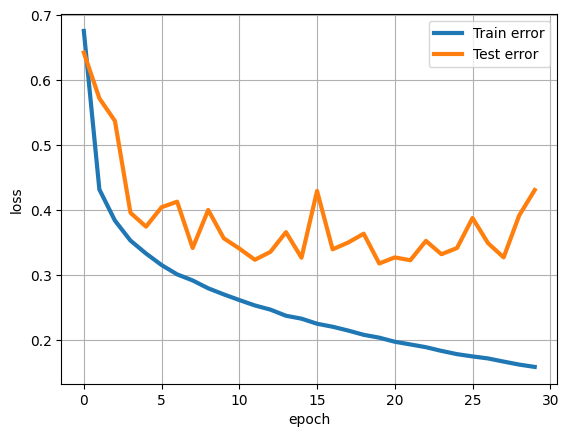

lr = 0.5, bs = 16
Epoch 0, Train loss 1.4055138612190883, Test loss 1.4894605699539185
Epoch 1, Train loss 1.6507113271713256, Test loss 1.8477736347198486
Epoch 2, Train loss 1.6049257172902425, Test loss 1.6731732391357421
Epoch 3, Train loss 1.6878395191987356, Test loss 1.727337963104248
Epoch 4, Train loss 1.7446005902608235, Test loss 1.5755033868789672
Epoch 5, Train loss 1.97964450229009, Test loss 2.305569414138794
Epoch 6, Train loss 2.321903725369771, Test loss 2.3083862869262695
Epoch 7, Train loss 1.8791556344032287, Test loss 1.7465910579681396
Epoch 8, Train loss 1.8887174903869628, Test loss 1.767548211669922
Epoch 9, Train loss 1.7929356756528219, Test loss 1.791503250694275
Epoch 10, Train loss 1.7588702744801838, Test loss 1.8002338678359986
Epoch 11, Train loss 1.7461678135553995, Test loss 1.7344642293930053
Epoch 12, Train loss 1.7325390728632608, Test loss 1.7241738470077514
Epoch 13, Train loss 1.7196620374679565, Test loss 1.5838368619918823
Epoch 14, Train los

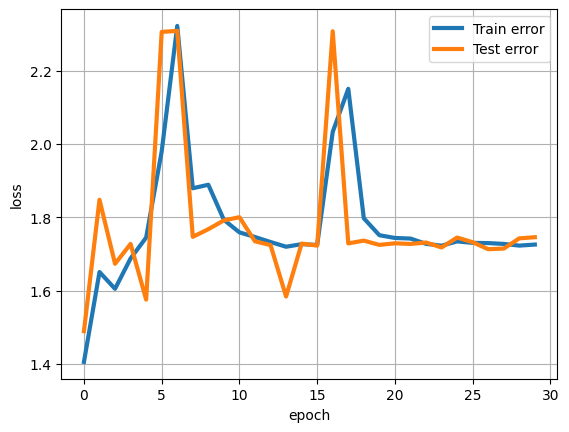

lr = 0.5, bs = 64
Epoch 0, Train loss 0.7442513303652502, Test loss 0.5509510738834454
Epoch 1, Train loss 0.4601848046662711, Test loss 0.5890663630643468
Epoch 2, Train loss 0.4044600948532507, Test loss 0.6066771341357261
Epoch 3, Train loss 0.3724656153494107, Test loss 0.4208133259586468
Epoch 4, Train loss 0.3577438860273819, Test loss 0.41391081415164244
Epoch 5, Train loss 0.3384053907367085, Test loss 0.40861224824455894
Epoch 6, Train loss 0.323650072799372, Test loss 0.4106899020113763
Epoch 7, Train loss 0.3120916542340952, Test loss 0.37485245411183427
Epoch 8, Train loss 0.30562002579572356, Test loss 0.41034015761629034
Epoch 9, Train loss 0.2934612771833756, Test loss 0.39111265207931495
Epoch 10, Train loss 0.2860218806784036, Test loss 0.38951317738195895
Epoch 11, Train loss 0.2813611279474075, Test loss 0.39296602092351124
Epoch 12, Train loss 0.27505206460081566, Test loss 0.45415353381140217
Epoch 13, Train loss 0.26693495770475506, Test loss 0.3452975139686256
Ep

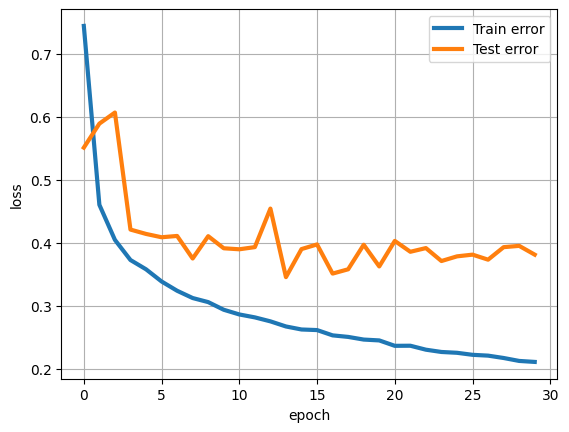

Best test accuracy: 88.87
Best hyperparameters: {'learning_rate': 0.1, 'batch_size': 16}


In [12]:
learning_rates = [0.1, 0.5]
batch_sizes = [16, 64]

best_test_accuracy = 0.0
best_hyperparameters = {'learning_rate': None, 'batch_size': None}

for lr in learning_rates:
  for bs in batch_sizes:
    print('lr = %s, bs = %s' % (lr, bs))
    trainDataLoader = torch.utils.data.DataLoader(trainingdata, batch_size=bs, shuffle=True)
    testDataLoader = torch.utils.data.DataLoader(testdata, batch_size=bs, shuffle=False)
    net = Net().cuda()
    Loss = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    train_loss_history = []
    test_loss_history = []
    num_epochs = 30

    for epoch in range(num_epochs):
      train_loss = 0.0
      test_loss = 0.0
      for i, data in enumerate(trainDataLoader):
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        optimizer.zero_grad()
        predicted_output = net(images)
        fit = Loss(predicted_output,labels)
        fit.backward()
        optimizer.step()
        train_loss += fit.item()
      for i, data in enumerate(testDataLoader):
        with torch.no_grad():
          images, labels = data
          images = images.cuda()
          labels = labels.cuda()
          predicted_output = net(images)
          fit = Loss(predicted_output,labels)
          test_loss += fit.item()
      train_loss = train_loss/len(trainDataLoader)
      test_loss = test_loss/len(testDataLoader)
      train_loss_history.append(train_loss)
      test_loss_history.append(test_loss)
      print('Epoch %s, Train loss %s, Test loss %s'%(epoch, train_loss, test_loss))
    train_accuracy = evaluate(trainDataLoader)
    test_accuracy = evaluate(testDataLoader)
    print('Train acc = %0.2f, test acc = %0.2f' % (train_accuracy, test_accuracy))
    plt.plot(np.arange(num_epochs),train_loss_history,'-',linewidth=3,label='Train error')
    plt.plot(np.arange(num_epochs),test_loss_history,'-',linewidth=3,label='Test error')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.grid(True)
    plt.legend()
    plt.show()
    if test_accuracy > best_test_accuracy:
      best_test_accuracy = test_accuracy
      best_hyperparameters['learning_rate'] = lr
      best_hyperparameters['batch_size'] = bs

print('Best test accuracy: %0.2f' % best_test_accuracy)
print('Best hyperparameters: %s' % best_hyperparameters)